# Examen de certificación – Análisis de Deserción de Clientes

## **Instrucciones para examen**

**Objetivo:**  
Este examen tiene como objetivo evaluar la capacidad del estudiante para limpiar, explorar, implementar y evaluar modelos de clasificación en un dataset de deserción de clientes. Utilizaremos el **«Customer Churn Dataset»** disponible en Kaggle. Los estudiantes deben demostrar habilidades prácticas en la manipulación de datos, creación de visualizaciones y modelado predictivo.

### **Contexto y Descripción del Dataset**
El **«Customer Churn Dataset»** contiene datos de una compañía de telecomunicaciones que describen el comportamiento de los clientes y su tendencia a desertar (*churn*). La tarea es predecir si un cliente abandonará la compañía basándose en varias características demográficas y de uso del servicio.

### **Diccionario de Datos**

1. **customerID:** Un identificador único para cada cliente.
2. **gender:** El género del cliente (*Male/Female*).
3. **SeniorCitizen:** Indica si el cliente es una persona mayor (*1*) o no (*0*).
4. **Partner:** Indica si el cliente tiene pareja (*Yes/No*).
5. **Dependents:** Indica si el cliente tiene dependientes (*Yes/No*).
6. **tenure:** Número de meses que el cliente ha estado con la compañía.
7. **PhoneService:** Indica si el cliente tiene servicio telefónico (*Yes/No*).
8. **MultipleLines:** Indica si el cliente tiene múltiples líneas telefónicas (*Yes/No/No phone service*).
9. **InternetService:** Tipo de servicio de internet del cliente (*DSL/Fiber optic/No*).
10. **OnlineSecurity:** Indica si el cliente tiene seguridad en línea (*Yes/No/No internet service*).
11. **OnlineBackup:** Indica si el cliente tiene respaldo en línea (*Yes/No/No internet service*).
12. **DeviceProtection:** Indica si el cliente tiene protección de dispositivos (*Yes/No/No internet service*).
13. **TechSupport:** Indica si el cliente tiene soporte técnico (*Yes/No/No internet service*).
14. **StreamingTV:** Indica si el cliente tiene servicio de TV en streaming (*Yes/No/No internet service*).
15. **StreamingMovies:** Indica si el cliente tiene servicio de películas en streaming (*Yes/No/No internet service*).
16. **Contract:** Tipo de contrato del cliente (*Month-to-month/One year/Two year*).
17. **PaperlessBilling:** Indica si el cliente tiene facturación electrónica (*Yes/No*).
18. **PaymentMethod:** Método de pago del cliente (*Electronic check/Mailed check/Bank transfer (automatic)/Credit card (automatic)*).
19. **MonthlyCharges:** Importe mensual que paga el cliente.
20. **TotalCharges:** Importe total pagado por el cliente.
21. **Churn:** Indica si el cliente ha abandonado la compañía (*Yes/No*).

## **Requisitos**

### **1. Limpieza de Datos**
- **Identificación y eliminación de valores duplicados:**  
  Asegúrate de que no haya registros duplicados que puedan sesgar los resultados del análisis.
- **Verificación y ajuste de tipos de datos:**  
  Verifica que cada columna tenga el tipo de dato correcto (numérico o categórico) y ajusta si es necesario.
- **Corrección de inconsistencias en valores categóricos:**  
  Revisa las categorías de las variables y unifica aquellos valores que puedan estar escritos de diferentes maneras pero que representen lo mismo.
- **Manejo de valores faltantes:**  
  Identifica y maneja los valores faltantes utilizando técnicas apropiadas como la imputación de la mediana, media o moda, según corresponda.

### **2. Exploración de Datos**
- **Visualizaciones univariadas y multivariadas:**  
  Crea histogramas, gráficos de barras, diagramas de dispersión y mapas de calor para entender la distribución y las relaciones entre las variables.
- **Estadísticas descriptivas:**  
  Calcula medidas de tendencia central (media, mediana, moda) y de dispersión (rango, desviación estándar) para cada característica del dataset.

### **3. Implementación de Modelos**
- **Modelos de Clasificación:**  
  Implementa modelos de SVM y XGBoost.
- **Optimización de Modelos:**  
  Utiliza `RandomizedSearchCV` para optimizar los hiperparámetros de los modelos.
- **Evaluación de Modelos:**  
  Evalúa los modelos utilizando métricas como `accuracy`, `precision`, `recall`, `F1-score`, y `ROC-AUC`.
- **Comparación de Rendimiento:**  
  Compara los resultados de ambos modelos y discute cuál es el más adecuado para este dataset.

## **Entrega**

Los estudiantes deben entregar un archivo `.ipynb` comentado que incluya:
- Proceso completo de limpieza y preprocesamiento de datos.
- Visualizaciones y estadísticas descriptivas.
- Implementación y evaluación de los modelos de clasificación.
- Análisis comparativo del rendimiento de los modelos.

**Además:**  
El archivo debe subirse a GitHub con un tag de liberación (*release tag*) que permita identificar la entrega final.

## **Consideraciones Éticas y Tecnológicas**

### **Consideraciones Éticas**
1. **Transparencia y Reproducibilidad:**  
   Asegúrate de que todos los pasos del análisis sean claros y reproducibles. Otros investigadores deben poder seguir tus pasos y llegar a los mismos resultados.
2. **Imparcialidad y Sesgo:**  
   Revisa si existen sesgos en los datos que puedan afectar la imparcialidad del modelo. Es importante que los modelos no discriminen injustamente entre diferentes grupos de datos.

### **Consideraciones Tecnológicas**
1. **Herramientas Utilizadas:**  
   Utiliza herramientas estándar como Python, Jupyter Notebook, Pandas, Scikit-learn, Matplotlib y Seaborn.
2. **Escalabilidad:**  
   Considera cómo las técnicas aplicadas podrían escalarse para manejar conjuntos de datos más grandes y complejos.
3. **Optimización de Modelos:**  
   Utiliza técnicas como `RandomizedSearchCV` para optimizar los hiperparámetros y mejorar el rendimiento de los modelos.

**Link del Dataset:**  
Customer Churn Dataset

---



# **DESARROLLO**

### **1. Limpieza de Datos**
- **Identificación y eliminación de valores duplicados:**  
  Asegúrate de que no haya registros duplicados que puedan sesgar los resultados del análisis.
- **Verificación y ajuste de tipos de datos:**  
  Verifica que cada columna tenga el tipo de dato correcto (numérico o categórico) y ajusta si es necesario.
- **Corrección de inconsistencias en valores categóricos:**  
  Revisa las categorías de las variables y unifica aquellos valores que puedan estar escritos de diferentes maneras pero que representen lo mismo.
- **Manejo de valores faltantes:**  
  Identifica y maneja los valores faltantes utilizando técnicas apropiadas como la imputación de la mediana, media o moda, según corresponda.


In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import normalize_columns, identificar_duplicados, calculate_null, val_cat_unicos, val_num_unicos 
from scipy.stats import pointbiserialr


### OBS: El link del dataset expuesto no coincide con el diccionario mencionado, por lo que se decide usar en este apartado el del link del kaggle proporcionado.

In [85]:
# Cargar datos desde un archivo CSV - train
df= pd.read_csv(r'C:\Users\GIGABYTE\Documents\examen_machine_learning\examen_intento_3\data\train.csv')
df.head()


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [86]:
# Normalizar las columnas de ambos datasets(train y test)
# llamar a la función para Aplicar normalización a ambos datasets
df = normalize_columns(df)

# Mostrar nombres de columnas normalizados
print("Columnas en df_train:", df.columns)



Columnas en df_train: Index(['customerid', 'age', 'gender', 'tenure', 'usage_frequency',
       'support_calls', 'payment_delay', 'subscription_type',
       'contract_length', 'total_spend', 'last_interaction', 'churn'],
      dtype='object')


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   customerid         440832 non-null  float64
 1   age                440832 non-null  float64
 2   gender             440832 non-null  object 
 3   tenure             440832 non-null  float64
 4   usage_frequency    440832 non-null  float64
 5   support_calls      440832 non-null  float64
 6   payment_delay      440832 non-null  float64
 7   subscription_type  440832 non-null  object 
 8   contract_length    440832 non-null  object 
 9   total_spend        440832 non-null  float64
 10  last_interaction   440832 non-null  float64
 11  churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


### **Identificación y eliminación de valores duplicados:**  
  Asegúrate de que no haya registros duplicados que puedan sesgar los resultados del análisis.

In [88]:
# Llamar a la función para contar duplicados
num_duplicados = identificar_duplicados(df)

Número de registros duplicados: 0


In [89]:
val_cat_unicos(df)

Valores únicos en la columna 'gender':
['Female' 'Male' nan]

Valores únicos en la columna 'subscription_type':
['Standard' 'Basic' 'Premium' nan]

Valores únicos en la columna 'contract_length':
['Annual' 'Monthly' 'Quarterly' nan]



In [90]:
val_num_unicos(df)

Valores únicos en la columna 'customerid':
[2.00000e+00 3.00000e+00 4.00000e+00 ... 4.49997e+05 4.49998e+05
 4.49999e+05]

Valores únicos en la columna 'age':
[30. 65. 55. 58. 23. 51. 39. 64. 29. 52. 22. 48. 24. 49. 19. 47. 42. 57.
 27. 59. 21. 60. 35. 18. 56. 20. 63. 25. 28. 32. 38. 37. 31. 53. 41. 33.
 26. 36. 44. 34. 61. 40. 45. 46. 54. 43. 50. 62. nan]

Valores únicos en la columna 'tenure':
[39. 49. 14. 38. 32. 33. 37. 12.  3. 18. 21. 41. 35.  4. 56. 44. 15. 55.
 43. 52. 26.  2. 29. 59. 40. 51. 53. 24. 30.  6. 28. 17. 60.  7. 34. 10.
  5. 45. 54. 58. 25. 13. 47. 31. 22. 19. 23.  1.  8. 46. 16. 50. 48. 11.
 42. 27.  9. 20. 57. 36. nan]

Valores únicos en la columna 'usage_frequency':
[14.  1.  4. 21. 20. 25. 12.  8.  5.  9.  6. 17. 23. 13. 16. 27.  2. 28.
 29. 15. 24.  3. 22. 26. 30.  7. 11. 18. 19. 10. nan]

Valores únicos en la columna 'support_calls':
[ 5. 10.  6.  7.  9.  3.  4.  2.  0.  1.  8. nan]

Valores únicos en la columna 'payment_delay':
[18.  8.  7. 26. 16. 15.  4. 11.

In [91]:
# Detectar columnas con valores únicos ['Yes', 'No']
yes_no_columns = [col for col in df.columns if sorted(df[col].dropna().unique()) == ['No', 'Yes']]
print("Columnas con valores 'Yes' y 'No':", yes_no_columns)
# Aplicar el mapeo 'Yes' -> 1 y 'No' -> 0 a todas las columnas de una vez usando map y itertools
df[yes_no_columns] = pd.DataFrame(
    map(lambda col: df[col].map({'Yes': 1, 'No': 0}), yes_no_columns)
).T.set_axis(yes_no_columns, axis=1)

Columnas con valores 'Yes' y 'No': []


### **Verificación y ajuste de tipos de datos:**  
  Verifica que cada columna tenga el tipo de dato correcto (numérico o categórico) y ajusta si es necesario.

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   customerid         440832 non-null  float64
 1   age                440832 non-null  float64
 2   gender             440832 non-null  object 
 3   tenure             440832 non-null  float64
 4   usage_frequency    440832 non-null  float64
 5   support_calls      440832 non-null  float64
 6   payment_delay      440832 non-null  float64
 7   subscription_type  440832 non-null  object 
 8   contract_length    440832 non-null  object 
 9   total_spend        440832 non-null  float64
 10  last_interaction   440832 non-null  float64
 11  churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [93]:
# Llamar a la función para identificar nulos
calculate_null(df)

,datos sin NAs en q,Na en q,Na en %
customerid,440832,1,0.0
age,440832,1,0.0
gender,440832,1,0.0
tenure,440832,1,0.0
usage_frequency,440832,1,0.0
support_calls,440832,1,0.0
payment_delay,440832,1,0.0
subscription_type,440832,1,0.0
contract_length,440832,1,0.0
total_spend,440832,1,0.0


In [94]:
#Como aparentemente es una sola fila entonces decido eliminar y a modo de verificar contar el numero de filas que se eliminaron
# Contar las filas antes de eliminar
num_filas_antes = df.shape[0]

# Eliminar filas con valores nulos
df= df.dropna()

# Contar las filas después de eliminar
num_filas_despues = df.shape[0]

# Calcular cuántas filas fueron eliminadas
num_eliminadas = num_filas_antes - num_filas_despues

# Mostrar el número de filas eliminadas
print(f"Se eliminaron ({num_eliminadas}) filas.")


Se eliminaron (1) filas.


In [95]:
# Definir el diccionario de tipos de datos
data_dict = {
    'customerid': 'object',  # Si el customerid es un identificador, debe ser tratado como 'object'
    'age': 'int64',  # Edad es numérica
    'gender': 'category',  # El género puede ser categórico
    'tenure': 'int64',  # El tiempo de tenencia (tenure) es numérico
    'usage_frequency': 'int64',  # Frecuencia de uso es numérica
    'support_calls': 'int64',  # Llamadas de soporte 
    'payment_delay': 'int64',  # Retraso en el pago 
    'subscription_type': 'category',  # El tipo de suscripción 
    'contract_length': 'category',  # El contrato debe ser categórico
    'total_spend': 'float64',  # Gasto total es numérico
    'last_interaction': 'int64',  # La última interacción es numérica
    'churn': 'bool'  # Churn (baja) es booleano
}

# Convertir los tipos de datos según el diccionario
for column, dtype in data_dict.items():
    df[column] = df[column].astype(dtype, errors='ignore')

# Verificar la información del DataFrame después de la conversión
df.info()
print()
val_cat_unicos(df)
print()
val_num_unicos(df)


<class 'pandas.core.frame.DataFrame'>
Index: 440832 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   customerid         440832 non-null  object  
 1   age                440832 non-null  int64   
 2   gender             440832 non-null  category
 3   tenure             440832 non-null  int64   
 4   usage_frequency    440832 non-null  int64   
 5   support_calls      440832 non-null  int64   
 6   payment_delay      440832 non-null  int64   
 7   subscription_type  440832 non-null  category
 8   contract_length    440832 non-null  category
 9   total_spend        440832 non-null  float64 
 10  last_interaction   440832 non-null  int64   
 11  churn              440832 non-null  bool    
dtypes: bool(1), category(3), float64(1), int64(6), object(1)
memory usage: 32.0+ MB

Valores únicos en la columna 'customerid':
[2.0 3.0 4.0 ... 449997.0 449998.0 449999.0]

Valores únicos en l

### **Corrección de inconsistencias en valores categóricos:**  
  Revisa las categorías de las variables y unifica aquellos valores que puedan estar escritos de diferentes maneras pero que representen lo mismo.



In [96]:
# Identificar columnas de tipo 'object', típicamente usadas para variables categóricas
categorical_columns = df.select_dtypes(include=['category','bool']).columns
# Crear un diccionario donde cada clave es el nombre de la columna y los valores son los valores únicos de esa columna
unique_values_dict = {col: df[col].unique() for col in categorical_columns}
# Convertir el diccionario en un DataFrame, rellenando con NaN cuando haya menos valores únicos
unique_values_df = pd.DataFrame.from_dict(unique_values_dict, orient='index').transpose()
# Mostrar el DataFrame resultante
unique_values_df.T

,0,1,2
gender,Female,Male,None
subscription_type,Standard,Basic,Premium
contract_length,Annual,Monthly,Quarterly
churn,True,False,None


### **Manejo de valores faltantes:**  
  Identifica y maneja los valores faltantes utilizando técnicas apropiadas como la imputación de la mediana, media o moda, según corresponda.

In [97]:
# Llamar a la función para identificar nulos
calculate_null(df)

,datos sin NAs en q,Na en q,Na en %
customerid,440832,0,0.0
age,440832,0,0.0
gender,440832,0,0.0
tenure,440832,0,0.0
usage_frequency,440832,0,0.0
support_calls,440832,0,0.0
payment_delay,440832,0,0.0
subscription_type,440832,0,0.0
contract_length,440832,0,0.0
total_spend,440832,0,0.0


In [98]:
identificar_duplicados(df)

Número de registros duplicados: 0


np.int64(0)

### **2. Exploración de Datos**
- **Visualizaciones univariadas y multivariadas:**  
  Crea histogramas, gráficos de barras, diagramas de dispersión y mapas de calor para entender la distribución y las relaciones entre las variables.
- **Estadísticas descriptivas:**  
  Calcula medidas de tendencia central (media, mediana, moda) y de dispersión (rango, desviación estándar) para cada característica del dataset.

**Hipótesis**
**Hipótesis de Pérdida de Clientes (Churn):**

**Hipótesis principal:** La pérdida de clientes (churn) puede estar asociada a factores como la frecuencia de uso del servicio, la duración del contrato y el tipo de suscripción. 

Los clientes con una baja frecuencia de uso, contratos más cortos (mensuales o trimestrales) y aquellos con un tipo de suscripción estándar o básico pueden tener una mayor probabilidad de abandonar el servicio.

En particular, los clientes que tienen menos interacción con el soporte, mayores retrasos en los pagos o un bajo gasto total en el servicio pueden estar más inclinados a cancelar su suscripción.

Para explorar los datos en función de esta hipótesis, se pueden analizar las variables relacionadas con el churn. Ya que se mencionan algunas columnas booleanas (como la columna churn), podemos hacer una visualización de la distribución de valores en estas columnas y explorar si hay alguna tendencia destacada que pueda estar asociada al comportamiento de pérdida de clientes.

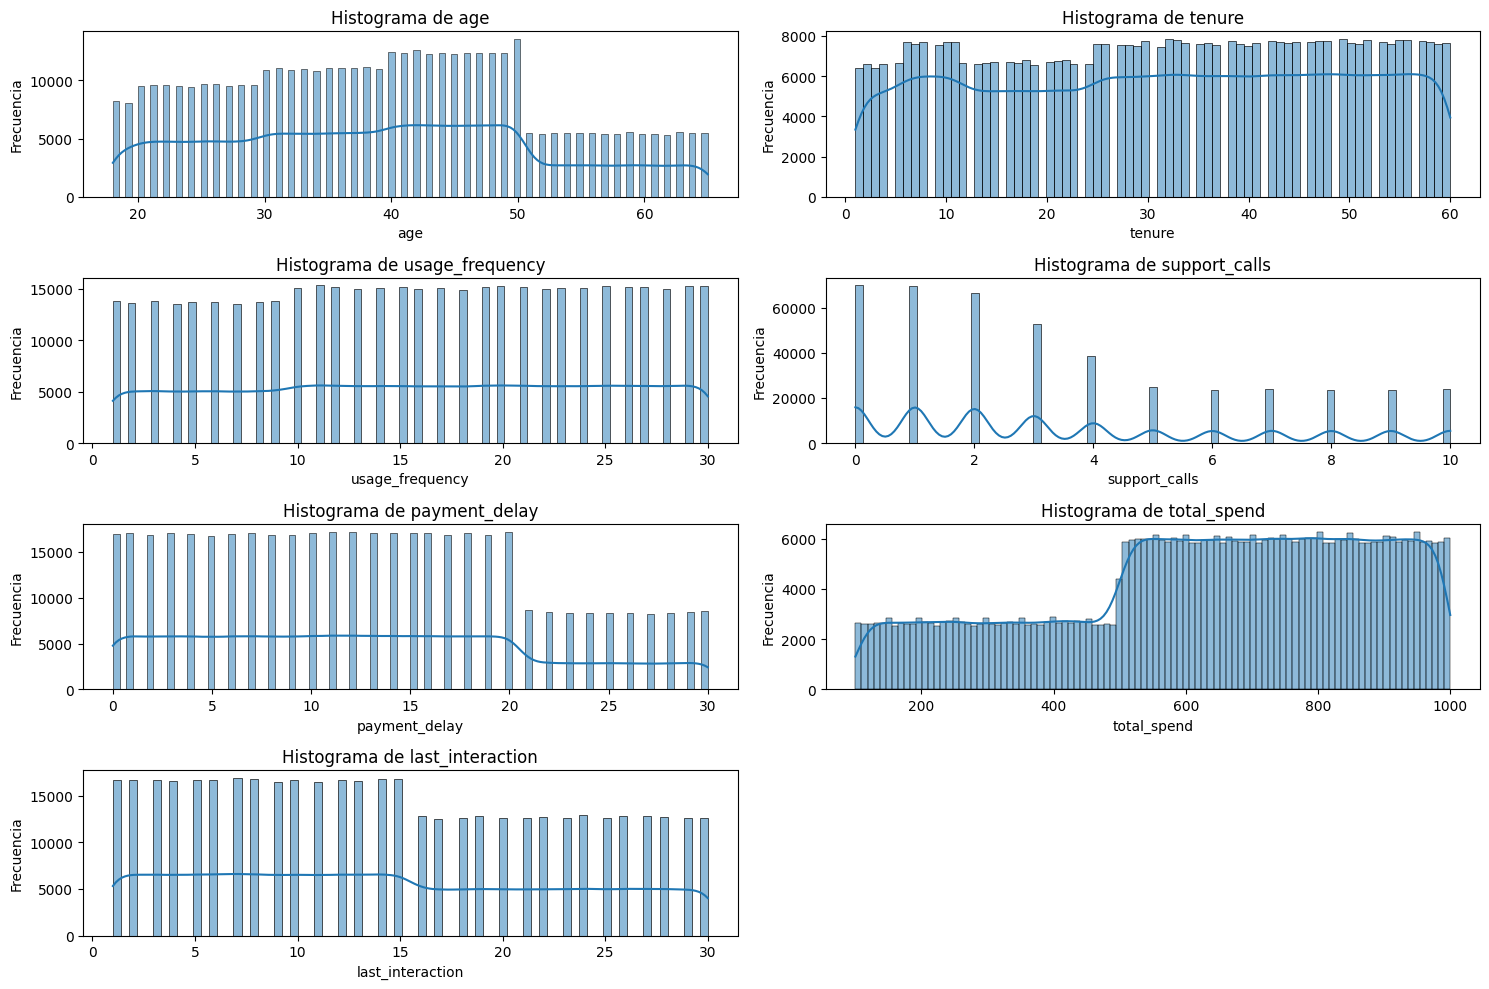

In [99]:
# ----------------------------------------------
# Visualización Univariada
# ----------------------------------------------
# 1. Histograma para las variables numéricas
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns)//2 + 1, 2, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


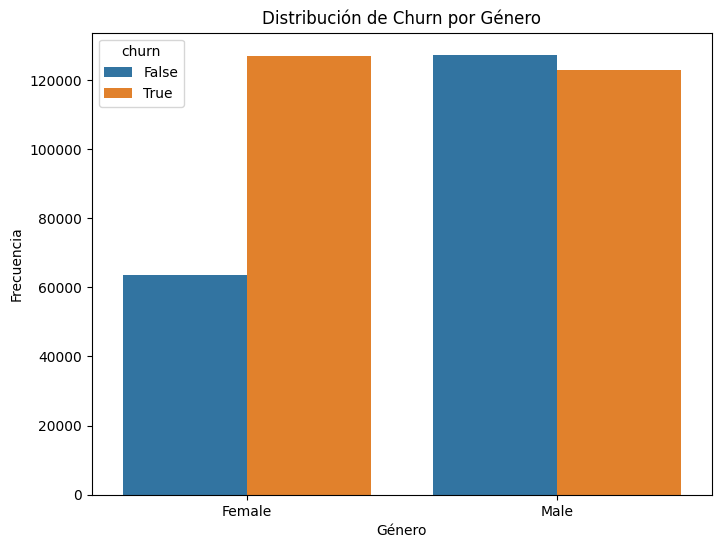

In [100]:

# 2. Visualización de churn con la variable 'gender'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='gender', hue='churn')
plt.title('Distribución de Churn por Género')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()


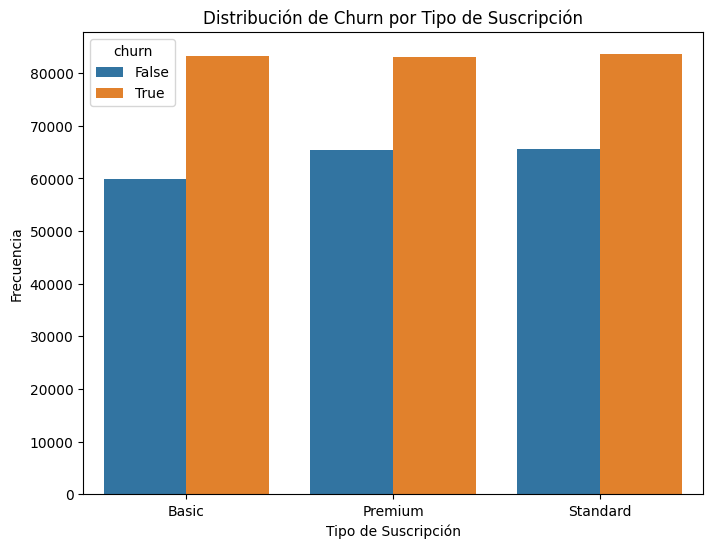

In [101]:
# 3. Visualización de churn con la variable 'subscription_type'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='subscription_type', hue='churn')
plt.title('Distribución de Churn por Tipo de Suscripción')
plt.xlabel('Tipo de Suscripción')
plt.ylabel('Frecuencia')
plt.show()

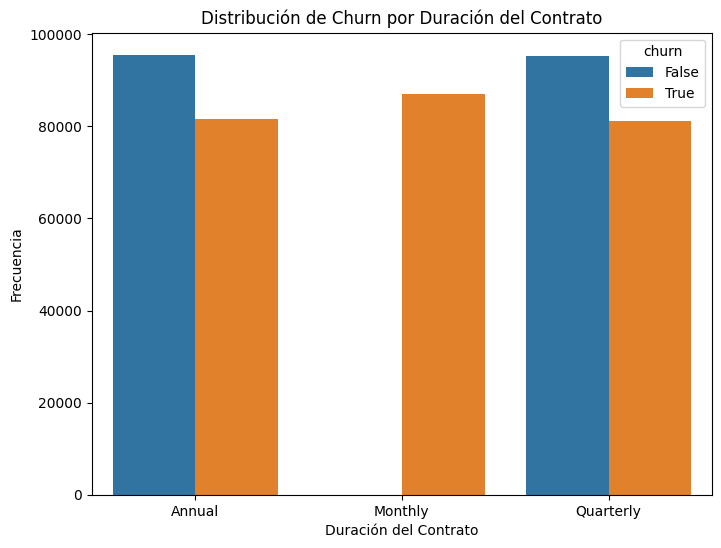

In [102]:
# 4. Visualización de churn con la variable 'contract_length'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='contract_length', hue='churn')
plt.title('Distribución de Churn por Duración del Contrato')
plt.xlabel('Duración del Contrato')
plt.ylabel('Frecuencia')
plt.show()

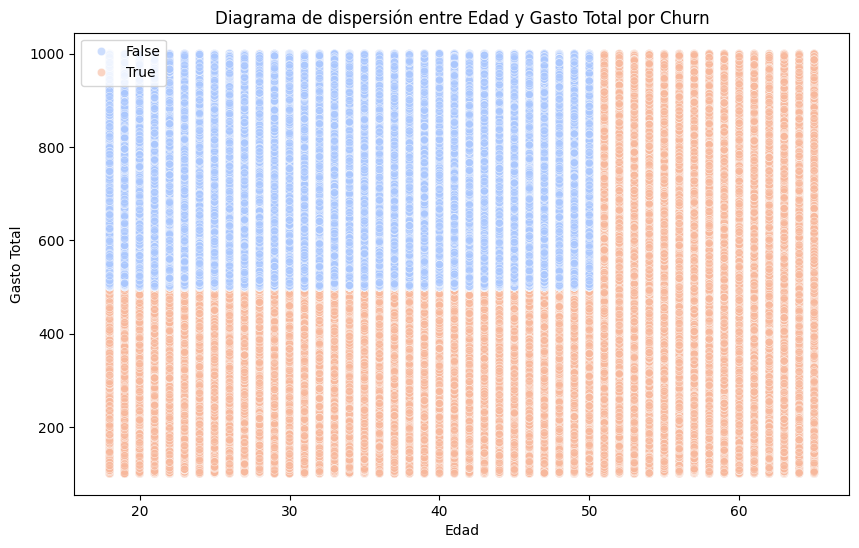

In [103]:
# ----------------------------------------------
# Visualización Multivariada
# ----------------------------------------------
# 1. Diagrama de dispersión entre 'age' y 'total_spend' en función de 'churn'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='total_spend', hue='churn', palette='coolwarm', alpha=0.6)
plt.title('Diagrama de dispersión entre Edad y Gasto Total por Churn')
plt.xlabel('Edad')
plt.ylabel('Gasto Total')
plt.legend(loc='upper left')  # Puedes especificar una ubicación fija
plt.show()


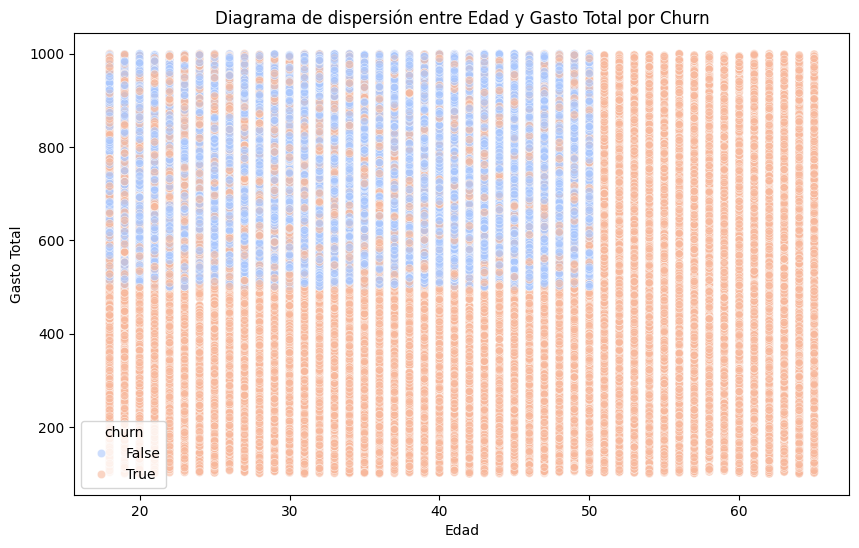

In [104]:
# Crear una muestra aleatoria del 10% de los datos
df_sample = df.sample(frac=0.1, random_state=42)

# Luego, usar el subdataset para la visualización
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_sample, x='age', y='total_spend', hue='churn', palette='coolwarm', alpha=0.6)
plt.title('Diagrama de dispersión entre Edad y Gasto Total por Churn')
plt.xlabel('Edad')
plt.ylabel('Gasto Total')
plt.show()

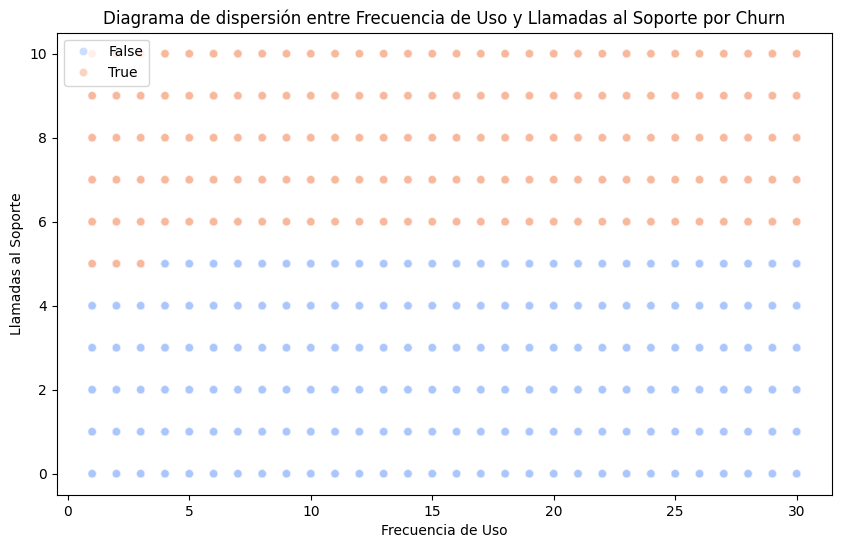

In [105]:
# 2. Diagrama de dispersión entre 'usage_frequency' y 'support_calls' en función de 'churn'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='usage_frequency', y='support_calls', hue='churn', palette='coolwarm', alpha=0.6)
plt.title('Diagrama de dispersión entre Frecuencia de Uso y Llamadas al Soporte por Churn')
plt.xlabel('Frecuencia de Uso')
plt.ylabel('Llamadas al Soporte')
plt.legend(loc='upper left')  # Ubicación fija para la leyenda
plt.show()



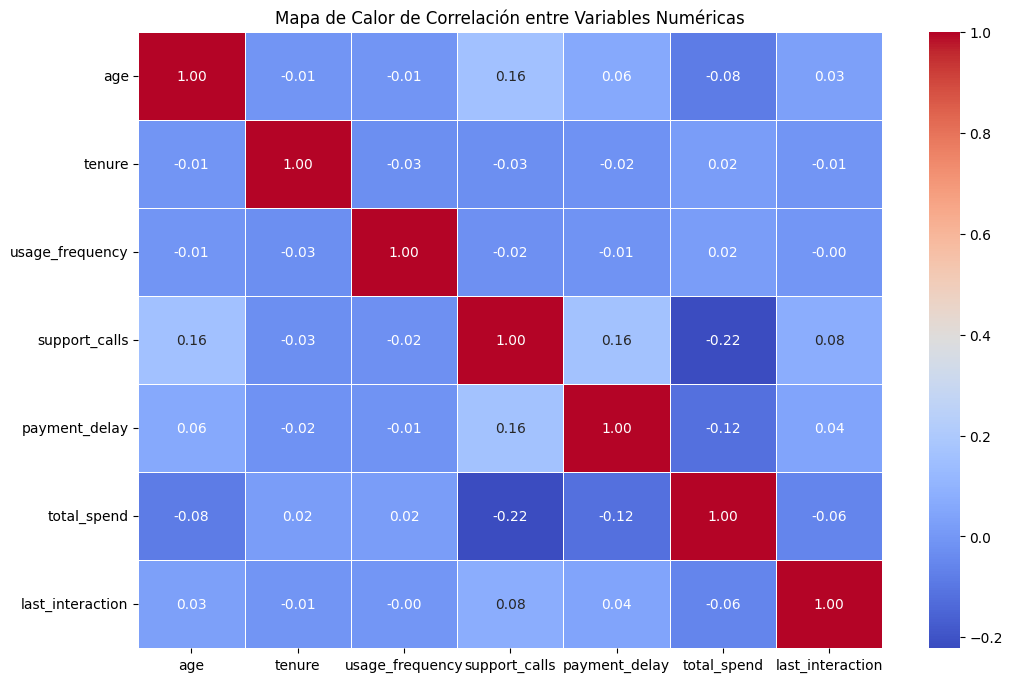

In [106]:
# 3. Mapa de calor para ver la correlación entre variables numéricas y churn
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor de Correlación entre Variables Numéricas')
plt.show()



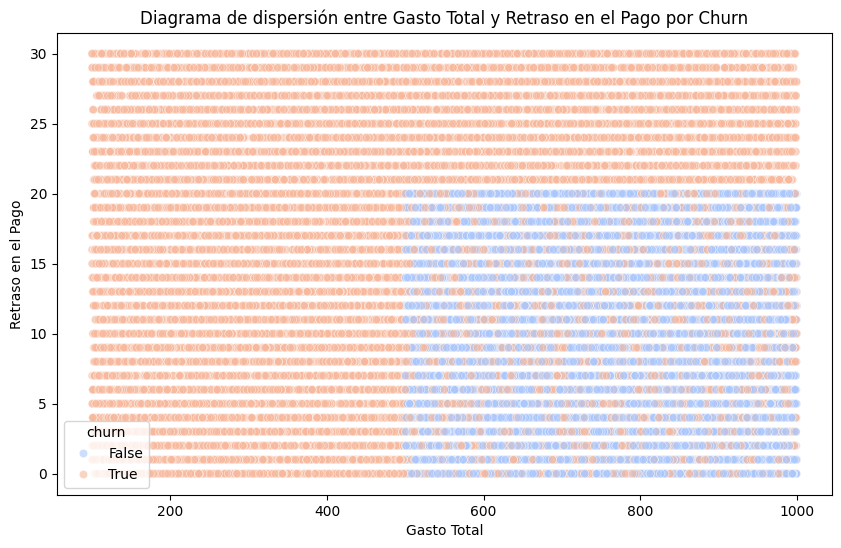

In [107]:
# 4. Visualización de la relación entre 'total_spend' y 'payment_delay'
# Crear una muestra aleatoria del 10% de los datos
df_sample = df.sample(frac=0.1, random_state=42)

# Usar el subdataset para la visualización
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_sample, x='total_spend', y='payment_delay', hue='churn', palette='coolwarm', alpha=0.6)
plt.title('Diagrama de dispersión entre Gasto Total y Retraso en el Pago por Churn')
plt.xlabel('Gasto Total')
plt.ylabel('Retraso en el Pago')
plt.show()


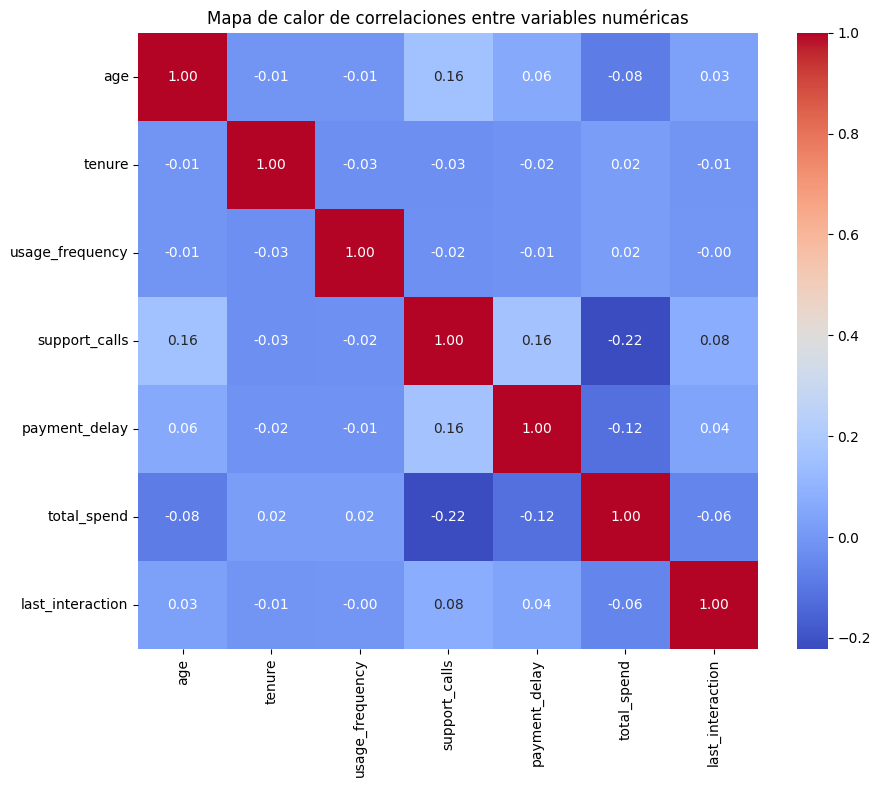

In [108]:
correlation_matrix = df[numerical_columns].corr()

# Graficar el heatmap de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Mapa de calor de correlaciones entre variables numéricas')
plt.show()

In [109]:
# Calcular estadísticas descriptivas para el DataFrame
desc_stats = df.describe().T  # Estadísticas descriptivas de variables numéricas
desc_stats['range'] = desc_stats['max'] - desc_stats['min']  # Calcular el rango
desc_stats['mode'] = df.mode().iloc[0]  # Calcular la moda

In [110]:
# Mostrar las estadísticas descriptivas
print("Estadísticas descriptivas:\n", desc_stats)

Estadísticas descriptivas:
                      count        mean         std    min    25%    50%  \
age               440832.0   39.373153   12.442369   18.0   29.0   39.0   
tenure            440832.0   31.256336   17.255727    1.0   16.0   32.0   
usage_frequency   440832.0   15.807494    8.586242    1.0    9.0   16.0   
support_calls     440832.0    3.604437    3.070218    0.0    1.0    3.0   
payment_delay     440832.0   12.965722    8.258063    0.0    6.0   12.0   
total_spend       440832.0  631.616223  240.803001  100.0  480.0  661.0   
last_interaction  440832.0   14.480868    8.596208    1.0    7.0   14.0   

                    75%     max  range   mode  
age                48.0    65.0   47.0   50.0  
tenure             46.0    60.0   59.0   32.0  
usage_frequency    23.0    30.0   29.0   11.0  
support_calls       6.0    10.0   10.0    0.0  
payment_delay      19.0    30.0   30.0   12.0  
total_spend       830.0  1000.0  900.0  234.0  
last_interaction   22.0    30.0   2

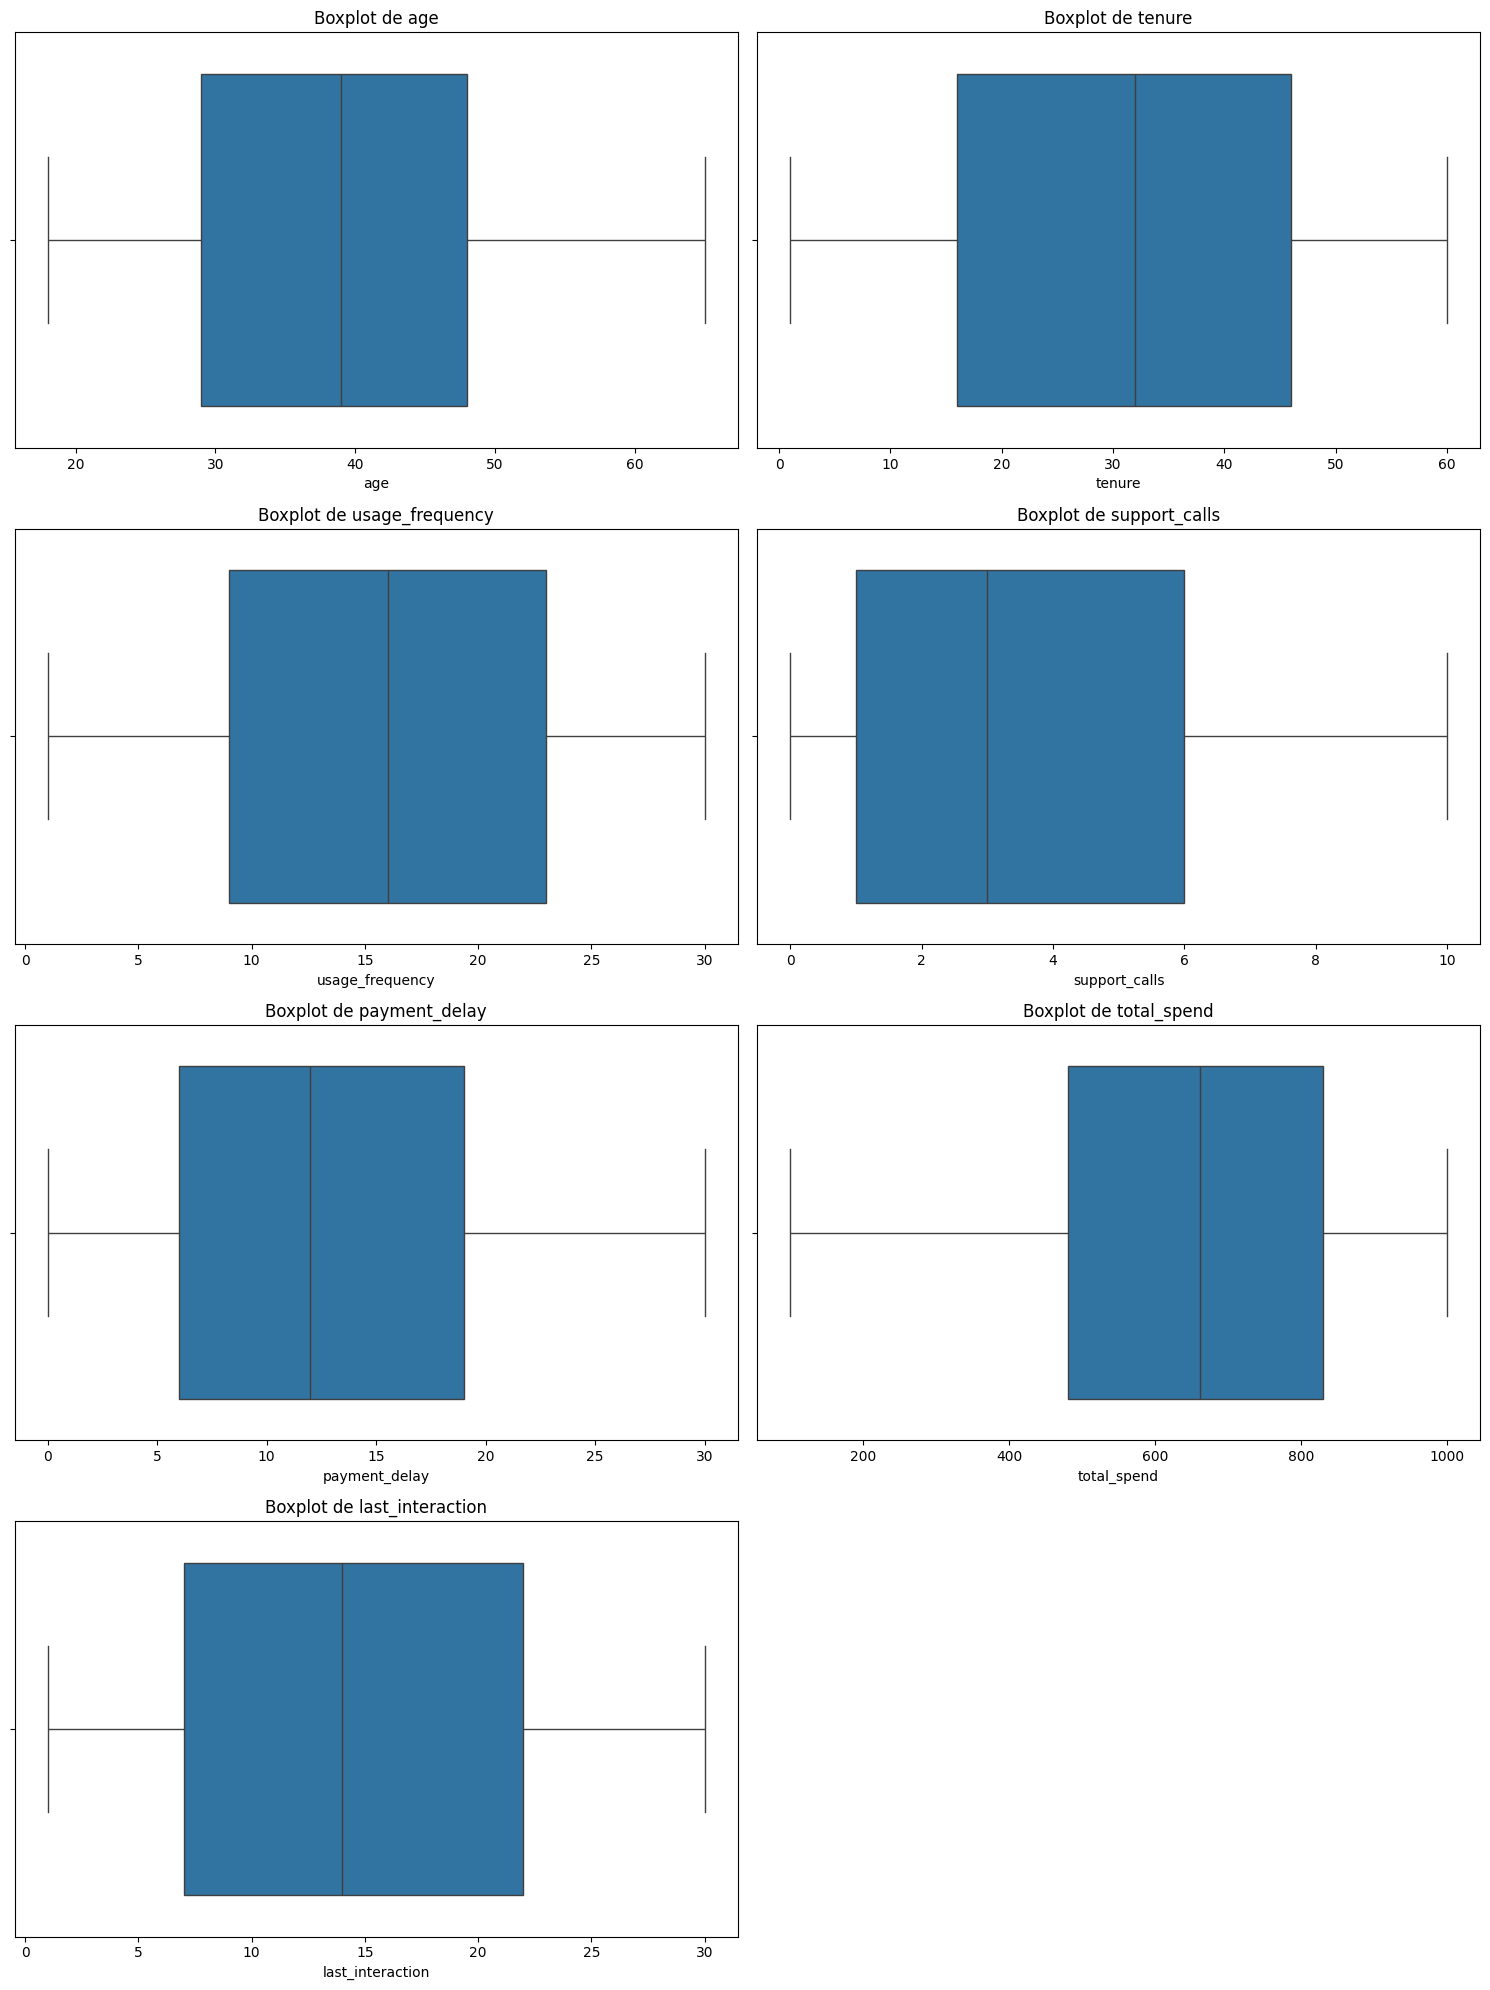

In [111]:
# Configuración del tamaño de la gráfica
n_cols = 2  # Número de columnas para los boxplots
n_rows = (len(numerical_columns) + 1) // n_cols  # Número de filas necesarias para los boxplots

plt.figure(figsize=(15, 5 * n_rows))  # Ajustar la altura según el número de filas

# Crear un boxplot para cada columna numérica
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(n_rows, n_cols, i)  # Colocamos los gráficos en una cuadrícula de 2 columnas
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot de {column}')
    plt.xlabel(column)

# Ajustar el layout para una mejor visualización
plt.tight_layout()
plt.show()

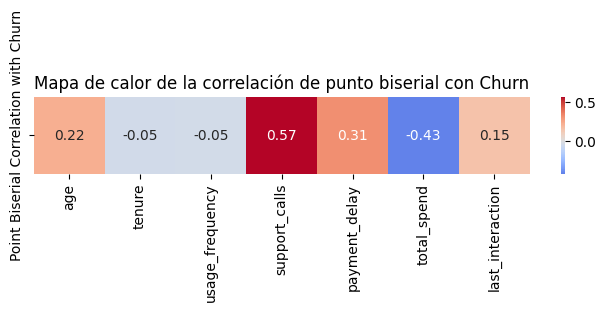

In [112]:

# Calcular la correlación de punto biserial entre Churn y las variables numéricas
churn_corr = {col: pointbiserialr(df['churn'], df[col])[0] for col in numerical_columns}

# Convertir el diccionario a un DataFrame para facilitar la visualización
churn_corr_df = pd.DataFrame.from_dict(churn_corr, orient='index', columns=['Point Biserial Correlation with Churn'])

# Graficar el heatmap de las correlaciones de punto biserial
plt.figure(figsize=(8, 1))
sns.heatmap(churn_corr_df.T, annot=True, cmap='coolwarm', center=0, cbar=True, fmt=".2f")
plt.title('Mapa de calor de la correlación de punto biserial con Churn')
plt.show()


In [113]:
# Seleccionar las columnas numéricas
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Imprimir las estadísticas descriptivas
df[numerical_columns].describe().T


,count,mean,std,min,25%,50%,75%,max
age,440832.0,39.373153,12.442369,18.0,29.0,39.0,48.0,65.0
tenure,440832.0,31.256336,17.255727,1.0,16.0,32.0,46.0,60.0
usage_frequency,440832.0,15.807494,8.586242,1.0,9.0,16.0,23.0,30.0
support_calls,440832.0,3.604437,3.070218,0.0,1.0,3.0,6.0,10.0
payment_delay,440832.0,12.965722,8.258063,0.0,6.0,12.0,19.0,30.0
total_spend,440832.0,631.616223,240.803001,100.0,480.0,661.0,830.0,1000.0
last_interaction,440832.0,14.480868,8.596208,1.0,7.0,14.0,22.0,30.0


### **3. Implementación de Modelos**
- **Modelos de Clasificación:**  
  Implementa modelos de SVM y XGBoost.
- **Optimización de Modelos:**  
  Utiliza `RandomizedSearchCV` para optimizar los hiperparámetros de los modelos.
- **Evaluación de Modelos:**  
  Evalúa los modelos utilizando métricas como `accuracy`, `precision`, `recall`, `F1-score`, y `ROC-AUC`.
- **Comparación de Rendimiento:**  
  Compara los resultados de ambos modelos y discute cuál es el más adecuado para este dataset.


In [114]:
# Selecciona una muestra aleatoria del 30% de los datos
sample = df.sample(frac=0.3, random_state=42)

sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 132250 entries, 159565 to 162821
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   customerid         132250 non-null  object  
 1   age                132250 non-null  int64   
 2   gender             132250 non-null  category
 3   tenure             132250 non-null  int64   
 4   usage_frequency    132250 non-null  int64   
 5   support_calls      132250 non-null  int64   
 6   payment_delay      132250 non-null  int64   
 7   subscription_type  132250 non-null  category
 8   contract_length    132250 non-null  category
 9   total_spend        132250 non-null  float64 
 10  last_interaction   132250 non-null  int64   
 11  churn              132250 non-null  bool    
dtypes: bool(1), category(3), float64(1), int64(6), object(1)
memory usage: 9.6+ MB


In [115]:
sample.head()

,customerid,age,gender,tenure,usage_frequency,support_calls,payment_delay,subscription_type,contract_length,total_spend,last_interaction,churn
159565,164376.0,23,Female,10,16,8,16,Premium,Quarterly,589.00,13,True
127464,131603.0,33,Male,3,20,0,22,Basic,Quarterly,158.00,12,True
22398,22407.0,27,Female,57,3,0,24,Standard,Annual,915.00,26,True
99337,102279.0,35,Female,28,23,5,13,Basic,Annual,334.00,29,True
300997,308111.0,28,Male,53,30,2,5,Basic,Annual,568.86,15,False


In [116]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


In [117]:
# Definir el orden para las columnas con categorías ordenadas
subscription_order = ['Basic', 'Standard', 'Premium']
contract_length_order = ['Monthly', 'Quarterly', 'Annual']
gender_order = ['Female', 'Male']  # Aunque no tiene un orden lógico, se codifica de esta forma


In [118]:
# Preprocesamiento
# Convertir las variables categóricas a numéricas usando OrdinalEncoder para columnas con orden
categorical_cols = ['gender', 'subscription_type', 'contract_length']
numerical_cols = ['age', 'tenure', 'usage_frequency', 'support_calls', 'payment_delay', 
                  'total_spend', 'last_interaction']

# Imputación y escalado de los datos
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numerical_cols),
        
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('ordinal_encoder', OrdinalEncoder(categories=[gender_order, subscription_order, contract_length_order]))
        ]), categorical_cols)
    ])


In [119]:
# Dividir el dataset en características (X) y objetivo (y)
X = sample.drop(['customerid', 'churn'], axis=1)
y = sample['churn']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [126]:
#Elegimos adaboost en vez de SVM
# AdaBoost - Optimización con RandomizedSearchCV y regularización
from sklearn.ensemble import AdaBoostClassifier

ada = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', AdaBoostClassifier(random_state=42))
])

ada_param_grid = {
    'classifier__n_estimators': [50, 75, 100],
    'classifier__learning_rate': [0.01, 0.05, 0.1]
}

ada_random_search = RandomizedSearchCV(ada, ada_param_grid, n_iter=10, cv=5, 
                                       verbose=2, random_state=42, n_jobs=-1)
ada_random_search.fit(X_train, y_train)


c:\Users\GIGABYTE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 9 candidates, totalling 45 fits


c:\Users\GIGABYTE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer()),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['age',
                                                                                'tenure',
                                                                                'usage_frequency',
                                                                                'support_calls',
                                                                                'payment_delay',
                                                                                'total_spend',
                                                                                'last_interaction']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(fill_value='missing',
                                                                                                              s...
                                                                                                OrdinalEncoder(categories=[['Female',
                                                                                                                            'Male'],
                                                                                                                           ['Basic',
                                                                                                                            'Standard',
                                                                                                                            'Premium'],
                                                                                                                           ['Monthly',
                                                                                                                            'Quarterly',
                                                                                                                            'Annual']]))]),
                                                                               ['gender',
                                                                                'subscription_type',
                                                                                'contract_length'])])),
                                             ('classifier',
                                              AdaBoostClassifier(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'classifier__learning_rate': [0.01,
                                                                      0.05,
                                                                      0.1],
                                        'classifier__n_estimators': [50, 75,
                                                                     100]},
                   random_state=42, verbose=2)

In [127]:
from xgboost import XGBClassifier

xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(eval_metric='logloss', random_state=42))
])

xgb_param_grid = {
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__max_depth': [3, 5],
    'classifier__n_estimators': [50, 100],
    'classifier__subsample': [0.8, 0.9],
    'classifier__colsample_bytree': [0.8, 0.9],
    'classifier__reg_alpha': [0.1, 1.0],  # L1 regularization
    'classifier__reg_lambda': [1.0, 10.0] # L2 regularization
}

xgb_random_search = RandomizedSearchCV(xgb, xgb_param_grid, n_iter=10, cv=5, 
                                       verbose=2, random_state=42, n_jobs=-1)
xgb_random_search.fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer()),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['age',
                                                                                'tenure',
                                                                                'usage_frequency',
                                                                                'support_calls',
                                                                                'payment_delay',
                                                                                'total_spend',
                                                                                'last_interaction']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(fill_value='missing',
                                                                                                              s...
                                                            num_parallel_tree=None,
                                                            random_state=42, ...))]),
                   n_jobs=-1,
                   param_distributions={'classifier__colsample_bytree': [0.8,
                                                                         0.9],
                                        'classifier__learning_rate': [0.01,
                                                                      0.05,
                                                                      0.1],
                                        'classifier__max_depth': [3, 5],
                                        'classifier__n_estimators': [50, 100],
                                        'classifier__reg_alpha': [0.1, 1.0],
                                        'classifier__reg_lambda': [1.0, 10.0],
                                        'classifier__subsample': [0.8, 0.9]},
                   random_state=42, verbose=2)

In [128]:
from sklearn.ensemble import RandomForestClassifier

rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

rf_param_grid = {
    'classifier__n_estimators': [50, 100, 150],
    'classifier__max_depth': [10, 15],
    'classifier__min_samples_split': [5, 10],
    'classifier__min_samples_leaf': [2, 5],
    'classifier__class_weight': ['balanced']
}

rf_random_search = RandomizedSearchCV(rf, rf_param_grid, n_iter=10, cv=5, 
                                      verbose=2, random_state=42, n_jobs=-1)
rf_random_search.fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer()),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['age',
                                                                                'tenure',
                                                                                'usage_frequency',
                                                                                'support_calls',
                                                                                'payment_delay',
                                                                                'total_spend',
                                                                                'last_interaction']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(fill_value='missing',
                                                                                                              s...
                                                                               ['gender',
                                                                                'subscription_type',
                                                                                'contract_length'])])),
                                             ('classifier',
                                              RandomForestClassifier(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'classifier__class_weight': ['balanced'],
                                        'classifier__max_depth': [10, 15],
                                        'classifier__min_samples_leaf': [2, 5],
                                        'classifier__min_samples_split': [5,
                                                                          10],
                                        'classifier__n_estimators': [50, 100,
                                                                     150]},
                   random_state=42, verbose=2)

In [129]:
from sklearn.ensemble import GradientBoostingClassifier

gb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

gb_param_grid = {
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [3, 5],
    'classifier__subsample': [0.8, 0.9]
}

gb_random_search = RandomizedSearchCV(gb, gb_param_grid, n_iter=10, cv=5, 
                                      verbose=2, random_state=42, n_jobs=-1)
gb_random_search.fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer()),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['age',
                                                                                'tenure',
                                                                                'usage_frequency',
                                                                                'support_calls',
                                                                                'payment_delay',
                                                                                'total_spend',
                                                                                'last_interaction']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(fill_value='missing',
                                                                                                              s...
                                                                                                                           ['Monthly',
                                                                                                                            'Quarterly',
                                                                                                                            'Annual']]))]),
                                                                               ['gender',
                                                                                'subscription_type',
                                                                                'contract_length'])])),
                                             ('classifier',
                                              GradientBoostingClassifier(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'classifier__learning_rate': [0.01,
                                                                      0.05,
                                                                      0.1],
                                        'classifier__max_depth': [3, 5],
                                        'classifier__n_estimators': [50, 100],
                                        'classifier__subsample': [0.8, 0.9]},
                   random_state=42, verbose=2)

In [130]:
from sklearn.linear_model import LogisticRegression

lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear', penalty='l2', C=1.0, random_state=42))
])

lr.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'tenure',
                                                   'usage_frequency',
                                                   'support_calls',
                                                   'payment_delay',
                                                   'total_spend',
                                                   'last_interaction']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('ordinal_encoder',
                                                                   OrdinalEncoder(categories=[['Female',
                                                                                               'Male'],
                                                                                              ['Basic',
                                                                                               'Standard',
                                                                                               'Premium'],
                                                                                              ['Monthly',
                                                                                               'Quarterly',
                                                                                               'Annual']]))]),
                                                  ['gender',
                                                   'subscription_type',
                                                   'contract_length'])])),
                ('classifier',
                 LogisticRegression(random_state=42, solver='liblinear'))])

In [131]:
from sklearn.metrics import classification_report, roc_auc_score

def evaluate_model(y_true, y_pred, model_name="Model"):
    print(f"\n{model_name} Evaluation:")
    print(classification_report(y_true, y_pred))
    print(f"ROC-AUC: {roc_auc_score(y_true, y_pred):.4f}")
    
# Evaluación en el conjunto de prueba
evaluate_model(y_test, ada_random_search.predict(X_test), "AdaBoost")
evaluate_model(y_test, xgb_random_search.predict(X_test), "XGBoost")
evaluate_model(y_test, rf_random_search.predict(X_test), "Random Forest")
evaluate_model(y_test, gb_random_search.predict(X_test), "Gradient Boosting")
evaluate_model(y_test, lr.predict(X_test), "Logistic Regression")



AdaBoost Evaluation:
              precision    recall  f1-score   support

       False       0.95      1.00      0.97     11387
        True       1.00      0.96      0.98     15063

    accuracy                           0.97     26450
   macro avg       0.97      0.98      0.97     26450
weighted avg       0.98      0.97      0.97     26450

ROC-AUC: 0.9772

XGBoost Evaluation:
              precision    recall  f1-score   support

       False       0.99      1.00      0.99     11387
        True       1.00      0.99      1.00     15063

    accuracy                           1.00     26450
   macro avg       0.99      1.00      1.00     26450
weighted avg       1.00      1.00      1.00     26450

ROC-AUC: 0.9958

Random Forest Evaluation:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     11387
        True       1.00      1.00      1.00     15063

    accuracy                           1.00     26450
   macro avg       1.00   

---
---
---
